In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget'
page=requests.get(url)
page

<Response [403]>

In [3]:
url = "https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)',
    'Referer': 'https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget'}
page = requests.get(url, headers=headers)
page

<Response [200]>

In [4]:
soup=BeautifulSoup(page.text)

In [5]:
soup.find_all('h1')[0].text

'\n\t\t\t\t\t\t\tCompanies in India\n\t\t\t\t\t\t'

In [6]:
List_company=soup.find_all('div',class_='companyCardWrapper')
len(List_company)

20

In [7]:
#all company names
company_names=[]
for i in soup.find_all('h2',class_='companyCardWrapper__companyName'):
    company_names.append(i.text.strip())
print(company_names)

['TCS', 'Accenture', 'Wipro', 'Cognizant', 'Capgemini', 'HDFC Bank', 'Infosys', 'ICICI Bank', 'HCLTech', 'Tech Mahindra', 'Genpact', 'Teleperformance', 'Axis Bank', 'Concentrix Corporation', 'Amazon', 'Jio', 'iEnergizer', 'Reliance Retail', 'IBM', 'LTIMindtree']


In [8]:
#multipage
for i in range(1,101):
    url=f'page{i}'
    

In [9]:
base_url='https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Referer': 'https://www.ambitionbox.com/'
}
company_names=[]
ratings=[]
reviews_count=[]
salary_count=[]
interview_count=[]
jobs_count=[]
locations=[]
company_sector=[]
benefits_count=[]
for page_num in range(1,101):
    url = f"{base_url}&page={page_num}"
    print(f"Scraping page: {page_num}")

    try:
        #response = requests.get(url, headers=headers)
        #response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

        soup = BeautifulSoup(page.text, 'html.parser')

        company_cards = soup.find_all('div', class_='companyCardWrapper')

        if not company_cards:
            print(f"No more company cards found on page {page_num}. Exiting loop.")
            break

        for card in company_cards:
            name_tag = card.find('h2', class_='companyCardWrapper__companyName')
            company_names.append(name_tag.text.strip() if name_tag else 'N/A')

            rating_tag = card.find('div', class_='rating_star_container')
            if rating_tag:
                try:
                    ratings.append(float(rating_tag.text.strip()))
                except ValueError:
                    ratings.append('N/A')
            else:
                ratings.append('N/A')

            reviews_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Reviews')
            reviews_count.append(reviews_tag.find_previous_sibling('span').text.strip() if reviews_tag and reviews_tag.find_previous_sibling('span') else 'N/A')

            salaries_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Salaries')
            salary_count.append(salaries_tag.find_previous_sibling('span').text.strip() if salaries_tag and salaries_tag.find_previous_sibling('span') else 'N/A')

            interviews_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Interviews')
            interview_count.append(interviews_tag.find_previous_sibling('span').text.strip() if interviews_tag and interviews_tag.find_previous_sibling('span') else 'N/A')

            jobs_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Jobs')
            jobs_count.append(jobs_tag.find_previous_sibling('span').text.strip() if jobs_tag and jobs_tag.find_previous_sibling('span') else 'N/A')
            
            sector_tag = card.find('span', class_='companyCardWrapper__interLinking')
            if sector_tag:
                full_text = sector_tag.text.strip()
                parts = full_text.split('|')
                company_sector.append(parts[0].strip())
                if len(parts) > 1:
                    locations.append(parts[1].strip())
                else:
                    locations.append('N/A')
            else:
                company_sector.append('N/A')
                locations.append('N/A')
                
            benefits_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Benefits')
            benefits_count.append(benefits_tag.find_previous_sibling('span').text.strip() if benefits_tag and benefits_tag.find_previous_sibling('span') else 'N/A')
    except requests.exceptions.HTTPError as e:
        print(f"HTTP Error on page {page_num}: {e}")
        print("Stopping scraping due to HTTP error.")
        break
    except requests.exceptions.RequestException as e:
        print(f"Request Error on page {page_num}: {e}")
        print("Stopping scraping due to network/request error.")
        break
    except Exception as e:
        print(f"An unexpected error occurred on page {page_num}: {e}")
        print("Stopping scraping due to an unexpected error.")
        break

         

Scraping page: 1
Scraping page: 2
Scraping page: 3
Scraping page: 4
Scraping page: 5
Scraping page: 6
Scraping page: 7
Scraping page: 8
Scraping page: 9
Scraping page: 10
Scraping page: 11
Scraping page: 12
Scraping page: 13
Scraping page: 14
Scraping page: 15
Scraping page: 16
Scraping page: 17
Scraping page: 18
Scraping page: 19
Scraping page: 20
Scraping page: 21
Scraping page: 22
Scraping page: 23
Scraping page: 24
Scraping page: 25
Scraping page: 26
Scraping page: 27
Scraping page: 28
Scraping page: 29
Scraping page: 30
Scraping page: 31
Scraping page: 32
Scraping page: 33
Scraping page: 34
Scraping page: 35
Scraping page: 36
Scraping page: 37
Scraping page: 38
Scraping page: 39
Scraping page: 40
Scraping page: 41
Scraping page: 42
Scraping page: 43
Scraping page: 44
Scraping page: 45
Scraping page: 46
Scraping page: 47
Scraping page: 48
Scraping page: 49
Scraping page: 50
Scraping page: 51
Scraping page: 52
Scraping page: 53
Scraping page: 54
Scraping page: 55
Scraping page: 56
S

In [10]:
data={'CompanyName':company_names,
    'Rating':ratings,
    'Reviews':reviews_count,
    'Salaries':salary_count,
    'Interviews':interview_count,
    'Jobs':jobs_count,
    'Location':locations,
    'CompanySector':company_sector,
    'Benefits':benefits_count,
}

In [11]:
#converting into dataframe
df=pd.DataFrame(data)
df

,CompanyName,Rating,Reviews,Salaries,Interviews,Jobs,Location,CompanySector,Benefits
0,TCS,3.5,1L,9.3L,11.4k,107,Bangalore / Bengaluru +414 other locations,IT Services & Consulting,10.6k
1,Accenture,3.7,65.9k,6.2L,8.8k,27.8k,Bangalore / Bengaluru +232 other locations,IT Services & Consulting,6.7k
2,Wipro,3.7,59.2k,4.6L,6.3k,7.5k,Hyderabad / Secunderabad +361 other locations,IT Services & Consulting,4.6k
3,Cognizant,3.7,56.3k,5.8L,6k,340,Hyderabad / Secunderabad +213 other locations,IT Services & Consulting,5.5k
4,Capgemini,3.7,48k,4.6L,5.2k,1.4k,Bangalore / Bengaluru +176 other locations,IT Services & Consulting,3.6k
...,...,...,...,...,...,...,...,...,...
1995,Jio,4.2,28.2k,62.1k,2.8k,64,Mumbai +1702 other locations,Telecom,2.5k
1996,iEnergizer,4.7,26.1k,23.2k,879,54,Noida +46 other locations,BPO,429
1997,Reliance Retail,3.9,25.1k,71.7k,1.8k,72,Mumbai +1113 other locations,Retail,1.9k
1998,IBM,3.9,24.1k,2.1L,2.5k,2.1k,Bangalore / Bengaluru +158 other locations,IT Services & Consulting,2.6k


In [12]:
import re
data = df.copy()
def extract_primary_city(location_str):
    if not isinstance(location_str, str):
        return None
    cleaned = re.sub(r'\s*\+\d+\s*other locations', '', location_str).strip()
    if ' | ' in cleaned:
        parts = cleaned.split(' | ')
        return parts[1].split('/')[0].strip() 
    return cleaned.split('/')[0].strip()

data['Primary_City'] = data['Location'].apply(extract_primary_city)

def extract_num_other_locations(location_str):
    if not isinstance(location_str, str):
        return 0
    match = re.search(r'\+(\d+)\s*other locations', location_str)
    if match:
        return int(match.group(1))
    return 0

data['Num_Other_Locations'] = data['Location'].apply(extract_num_other_locations)
data['Primary_City'] = data['Primary_City'].replace({
    'Bangalore': 'Bengaluru',
    'Noida': 'Noida'
})

data.drop('Location', axis=1, inplace=True)

print(data[['CompanySector', 'Primary_City', 'Num_Other_Locations']].head())


              CompanySector Primary_City  Num_Other_Locations
0  IT Services & Consulting    Bengaluru                  414
1  IT Services & Consulting    Bengaluru                  232
2  IT Services & Consulting    Hyderabad                  361
3  IT Services & Consulting    Hyderabad                  213
4  IT Services & Consulting    Bengaluru                  176


In [13]:
data

,CompanyName,Rating,Reviews,Salaries,Interviews,Jobs,CompanySector,Benefits,Primary_City,Num_Other_Locations
0,TCS,3.5,1L,9.3L,11.4k,107,IT Services & Consulting,10.6k,Bengaluru,414
1,Accenture,3.7,65.9k,6.2L,8.8k,27.8k,IT Services & Consulting,6.7k,Bengaluru,232
2,Wipro,3.7,59.2k,4.6L,6.3k,7.5k,IT Services & Consulting,4.6k,Hyderabad,361
3,Cognizant,3.7,56.3k,5.8L,6k,340,IT Services & Consulting,5.5k,Hyderabad,213
4,Capgemini,3.7,48k,4.6L,5.2k,1.4k,IT Services & Consulting,3.6k,Bengaluru,176
...,...,...,...,...,...,...,...,...,...,...
1995,Jio,4.2,28.2k,62.1k,2.8k,64,Telecom,2.5k,Mumbai,1702
1996,iEnergizer,4.7,26.1k,23.2k,879,54,BPO,429,Noida,46
1997,Reliance Retail,3.9,25.1k,71.7k,1.8k,72,Retail,1.9k,Mumbai,1113
1998,IBM,3.9,24.1k,2.1L,2.5k,2.1k,IT Services & Consulting,2.6k,Bengaluru,158


In [14]:
data.shape

(2000, 10)

In [15]:
data.size

20000

In [16]:
data.columns

Index(['CompanyName', 'Rating', 'Reviews', 'Salaries', 'Interviews', 'Jobs',
       'CompanySector', 'Benefits', 'Primary_City', 'Num_Other_Locations'],
      dtype='object')

In [17]:
#info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CompanyName          2000 non-null   object 
 1   Rating               2000 non-null   float64
 2   Reviews              2000 non-null   object 
 3   Salaries             2000 non-null   object 
 4   Interviews           2000 non-null   object 
 5   Jobs                 2000 non-null   object 
 6   CompanySector        2000 non-null   object 
 7   Benefits             2000 non-null   object 
 8   Primary_City         2000 non-null   object 
 9   Num_Other_Locations  2000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB


In [18]:
def convert_to_numeric(value):
    if pd.isna(value):
        return None
    s = str(value).strip()
    if 'k' in s:
        return float(s.replace('k', '')) * 1000
    elif 'L' in s:
        return float(s.replace('L', '')) * 100000
    elif ',' in s:
        return float(s.replace(',', ''))
    try:
        return float(s)
    except ValueError:
        return None


columns_to_convert = ['Reviews', 'Salaries', 'Interviews', 'Jobs','Benefits']

for col in columns_to_convert:
    data[col] = data[col].apply(convert_to_numeric)

data['Num_Other_Locations'] = pd.to_numeric(data['Num_Other_Locations'], errors='coerce').fillna(0).astype(int)

**Converting Datatypes to suitable datatypes**

In [19]:
data['Reviews']=data['Reviews'].astype('float32')
data['Salaries']=data['Salaries'].astype('float32')
data['Interviews']=data['Interviews'].astype('float32')
data['Jobs']=data['Jobs'].astype('float32')
data['Benefits']=data['Benefits'].astype('float32')

**Dataset Information**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CompanyName          2000 non-null   object 
 1   Rating               2000 non-null   float64
 2   Reviews              2000 non-null   float32
 3   Salaries             2000 non-null   float32
 4   Interviews           2000 non-null   float32
 5   Jobs                 2000 non-null   float32
 6   CompanySector        2000 non-null   object 
 7   Benefits             2000 non-null   float32
 8   Primary_City         2000 non-null   object 
 9   Num_Other_Locations  2000 non-null   int32  
dtypes: float32(5), float64(1), int32(1), object(3)
memory usage: 109.5+ KB


In [21]:
#converting to csv file and saving it
data.to_csv("ambition_box.csv",index=False)
print("Data Successfully saved to ambition_box.csv")

Data Successfully saved to ambition_box.csv


**Descriptive Statistics Before handling Outliers**


In [22]:
#describing the Data
data.describe()

,Rating,Reviews,Salaries,Interviews,Jobs,Benefits,Num_Other_Locations
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.790000,41480.000000,285505.000000,4268.950195,2295.649902,3630.199951,550.200000
std,0.287996,17990.707031,230985.046875,2677.828613,6073.813477,2169.385254,558.376264
min,3.400000,23500.000000,23200.000000,879.000000,8.000000,429.000000,46.000000
25%,3.700000,28350.000000,122500.000000,2375.000000,109.250000,2400.000000,174.000000
50%,3.700000,38600.000000,200000.000000,3350.000000,370.000000,3400.000000,240.500000
75%,3.900000,46275.000000,460000.000000,5625.000000,1425.000000,4225.000000,654.750000
max,4.700000,100000.000000,930000.000000,11400.000000,27800.000000,10600.000000,1730.000000


**Checking null values**

In [23]:
#verifing the null values present or not
data.isnull().sum()

CompanyName            0
Rating                 0
Reviews                0
Salaries               0
Interviews             0
Jobs                   0
CompanySector          0
Benefits               0
Primary_City           0
Num_Other_Locations    0
dtype: int64

**Detecting and Handling Outliers**

<Axes: >

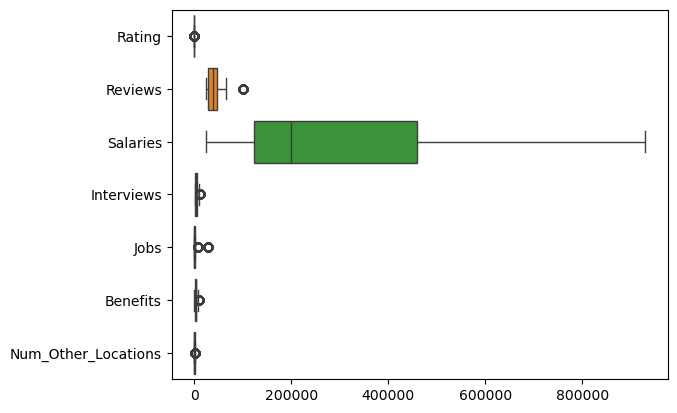

In [24]:
sns.boxplot(data,orient='h')

In [25]:
def handle_outliers(data,method="cap"):
    df1=data.copy()
    numeric_cols=df1.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        Q1=df1[col].quantile(0.25)
        Q3=df1[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q1+1.5*IQR
        if method=="remove":
            df1=df1[(df1[col]>=lower) & (df1[col]<=upper)]
        elif method=="cap":
            df1[col]=np.where(df1[col]>upper,upper,
                              np.where(df1[col]<lower,lower,df1[col]))
        elif method=="impute":
            median=df1[col].median()
            df1[col]=np.where(df1[col]>upper,median,
                              np.where(df1[col]<lower,median,df1[col]))
    return df1
df1=handle_outliers(data,method="cap")
            

        
        

<Axes: >

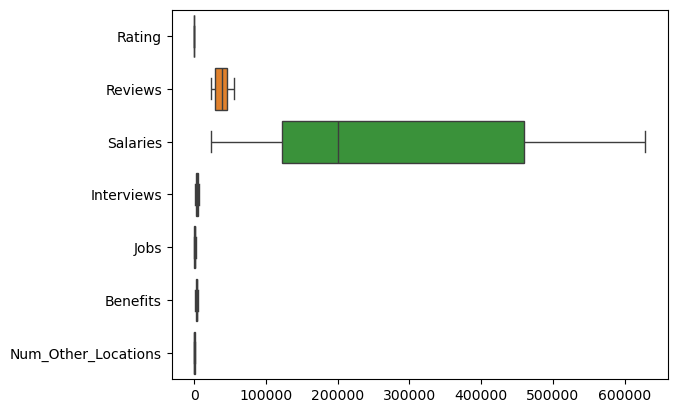

In [26]:
sns.boxplot(df1,orient='h')

**Descripitive Statistics**

In [27]:
df1.describe()

,Rating,Reviews,Salaries,Interviews,Jobs,Benefits,Num_Other_Locations
count,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.00000
mean,3.745000,38457.500000,270442.5000,3941.449951,738.081238,3260.824951,403.48125
std,0.188395,11160.522461,195554.0625,2022.884155,757.694519,1354.343018,300.38057
min,3.400000,23500.000000,23200.0000,879.000000,8.000000,429.000000,46.00000
25%,3.700000,28350.000000,122500.0000,2375.000000,109.250000,2400.000000,174.00000
50%,3.700000,38600.000000,200000.0000,3350.000000,370.000000,3400.000000,240.50000
75%,3.900000,46275.000000,460000.0000,5625.000000,1425.000000,4225.000000,600.28125
max,4.000000,55237.500000,628750.0000,7250.000000,2082.875000,5137.500000,895.12500


**Getting Columns**

In [28]:
df1.columns

Index(['CompanyName', 'Rating', 'Reviews', 'Salaries', 'Interviews', 'Jobs',
       'CompanySector', 'Benefits', 'Primary_City', 'Num_Other_Locations'],
      dtype='object')

**Unique value counts per column**

In [29]:
df1.nunique()

CompanyName            20
Rating                  6
Reviews                17
Salaries               18
Interviews             16
Jobs                   18
CompanySector           6
Benefits               18
Primary_City            5
Num_Other_Locations    16
dtype: int64

**Frequencies of unique rows**

In [30]:
df1.value_counts()

CompanyName             Rating  Reviews  Salaries  Interviews  Jobs      CompanySector             Benefits  Primary_City  Num_Other_Locations
Accenture               3.7     55237.5  620000.0  7250.0      2082.875  IT Services & Consulting  5137.5    Bengaluru     232.000                100
Amazon                  4.0     28400.0  140000.0  5500.0      1900.000  Internet                  4100.0    Bengaluru     502.000                100
Wipro                   3.7     55237.5  460000.0  6300.0      2082.875  IT Services & Consulting  4600.0    Hyderabad     361.000                100
Teleperformance         3.9     33900.0  93100.0   2000.0      545.000   BPO                       1800.0    Mumbai        248.000                100
Tech Mahindra           3.4     39600.0  270000.0  4300.0      482.000   IT Services & Consulting  3300.0    Hyderabad     325.000                100
TCS                     3.5     55237.5  628750.0  7250.0      107.000   IT Services & Consulting  5137.5  

**Univariate Analysis**

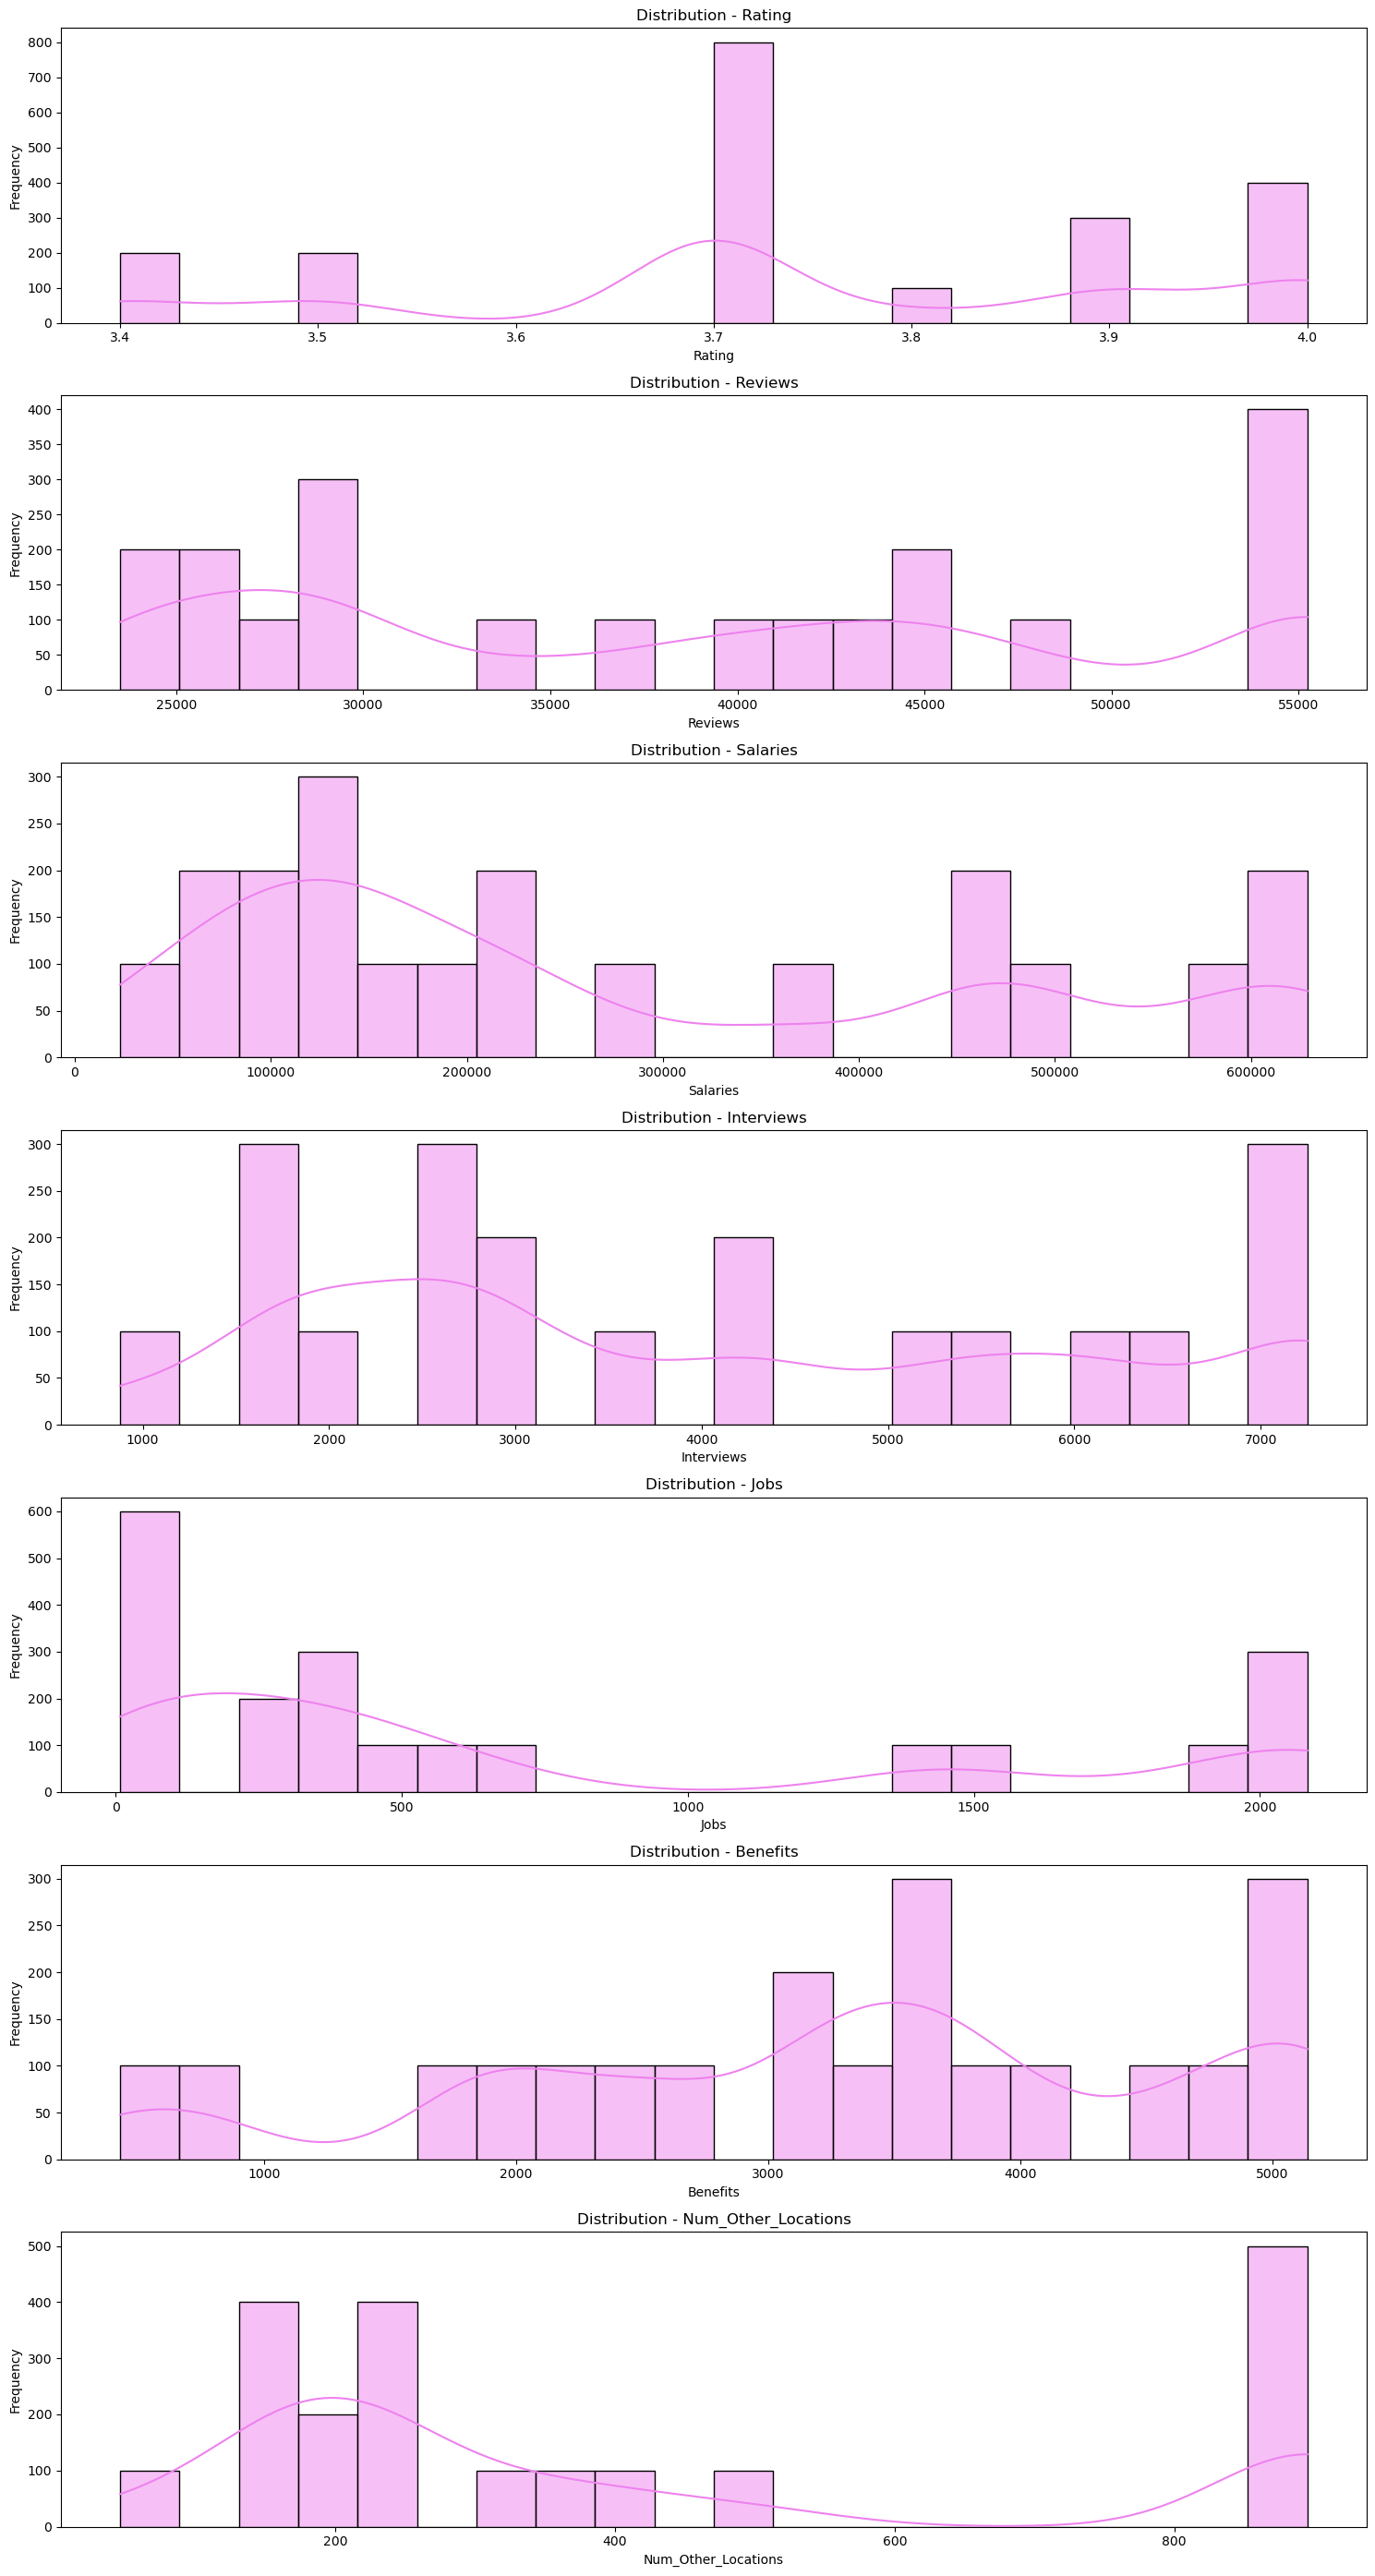

In [36]:
#numerical columns
num_cols=df1.select_dtypes(include=np.number).columns
#plotting for each numerical column with histogram+kde
plt.figure(figsize=(15,4*len(num_cols)))
for i,col in enumerate(num_cols):
    plt.subplot(len(num_cols),1,i+1)
    sns.histplot(df1[col],kde=True,bins=20,color='violet')
    plt.title(f'Distribution - {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Observations**
1. **Distribution with KDE-Rating**
        * Most of the ratings are concentrated at 3.7 i.e 3.7 is the most common rating given
        * The ratings are in between 3.4-4.0
        * Ratings 3.8 are less frequent
        * The distribution appears slightly left skewed
        * Majority of the entities being rated tend to receive above average ratings taht are around 3.7-4.0 i.e moderate to high satisfaction among raters

3. **Distribution with KDE-Reviews**

        * The distribution ranges from 25k to 55k reviews
        * A significant spike near 55k reviews that means very popular companies has high review counts
        * the distribution is right skewed

5. **Distribution with KDE-Salaries**

        * Most companies have salaries in the range of 100k-450k and very few comapnies show high salaries
        * the distribution is right skewed

7. **Distribution with KDE-Interviews**

        * Many companies have 2000-3000 interview count
        * Larger Companies record higher interviews showing greater candidate interest

9. **Distribution with KDE-Jobs**

        * most of the companies has job count less than 500
        * very few companies have higher job count(above 1000) showing variation in company size

11. **Distribution with KDE-Benefits**
    
        * Benefits mostly fall in between 1000-4000
        * some comapnies have higher benefits (~5000) indicating difference in employee offerings

13. **Distribution with KDE-Num_Other_Locations**

        * most of the comapnies are located around 200 other Locations
        * Some larger companies are located more than 800 other locations 

C:\Users\prani\AppData\Local\Temp\ipykernel_34136\3767589685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df1,order=df1[col].value_counts().index,palette="tab10")


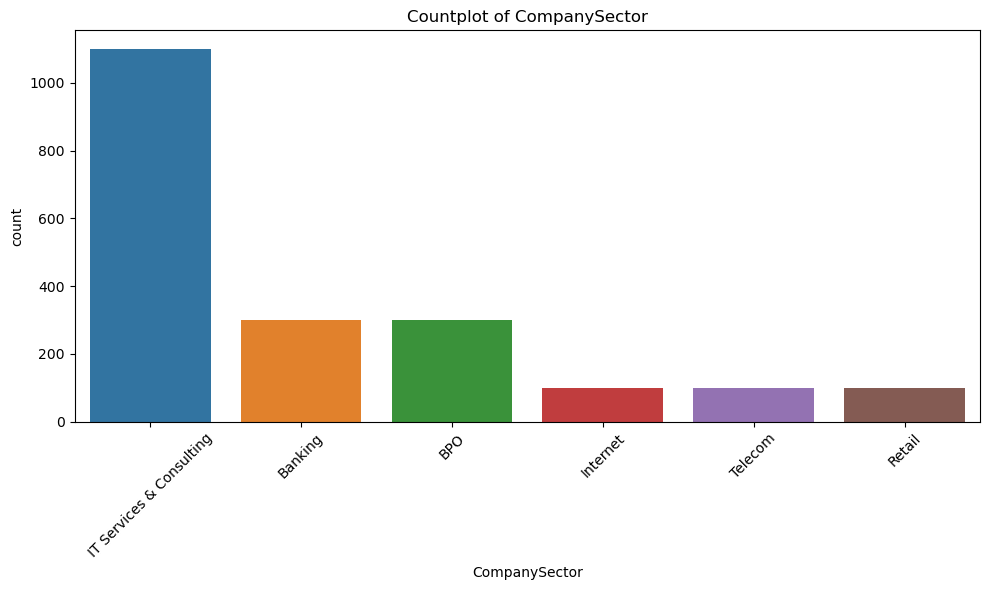

C:\Users\prani\AppData\Local\Temp\ipykernel_34136\3767589685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df1,order=df1[col].value_counts().index,palette="tab10")


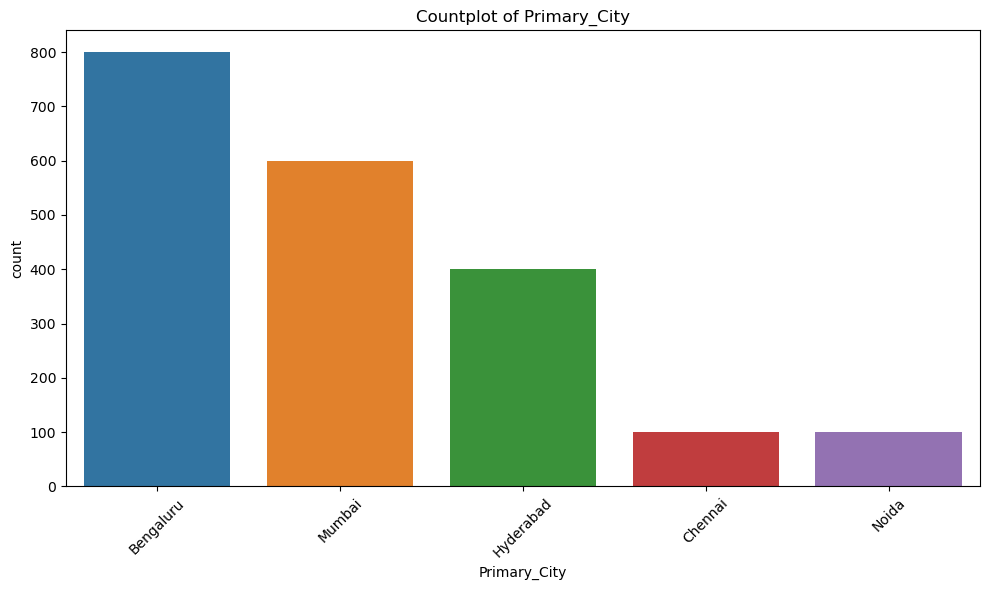

In [46]:
cat_cols=df1.select_dtypes('object').columns
cat_cols=cat_cols.drop("CompanyName")
for col in cat_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col,data=df1,order=df1[col].value_counts().index,palette="tab10")
    plt.xticks(rotation=45)
    plt.title(f'Countplot of {col}')
    plt.tight_layout()
    plt.show()

**Observations**

**1.Count Plot of CompanySector**
   *  **IT services and Consulting** has highest count i.e most of the companies are from this sector
   *  **BPO and Banking come next highest used sector but significantly fewer entries compared to IT servies and Consulting
   *  **Telecom,Internet,Retail** sectors are least used
**2.Count plot of PrimaryCity**
   *  **Bengaluru** leads with the highest no.of records,followed by **Mumbai** and **Hyderabad**
   *  **Chennai** and **Noida** has least counts in this set

    

**Bivariate Analysis**

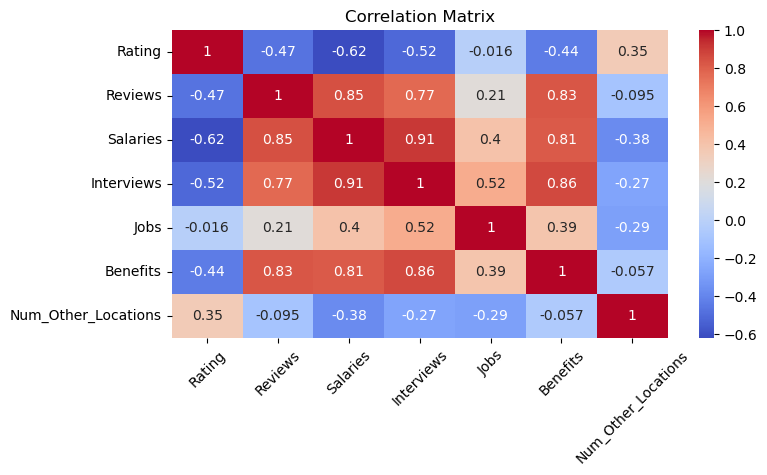

In [56]:
#To find the correlation between the variable we use heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df1.select_dtypes(include=np.number).corr(),annot=True,cmap='coolwarm')
plt.xticks(rotation=45)
plt.title("Correlation Matrix")
plt.show()

**Observations**

**1.Strong Positive Coorelation:**

    * Reviews & Salaries:correlation=0.85
    * Reviews & Interviews: correlation=0.77
    * Reviews & Benefits:correlation=0.83
    
**Companies with more reviews tend to have higher salaries ,more interviews and better benefits**

    * Salaries & Interviews:correlation=0.91
    * Salaries & Benefits:correlation=0.81
**Salaries are linked with interviews and benefits**

    * Interview & Jobs:correlation=0.52
    * Interview & Benefits:correlation=0.86
**Interviews have strong connection with jobs and benefits**

**2.Negative Correlation**

    * Rating &salaries(-0.62):Companies with higher salaries often have lower ratings
    * Ratings & Interviews(-0.52):companies with more interviews activity tend to have lower ratings

**3.Weak Coorelation**

    * num_other_locations has weak or negative with most features
    * Ratings & Jobs(-0.016):no relationship between company ratings and no.of jobs

**Top 10 Companies by Reviews**

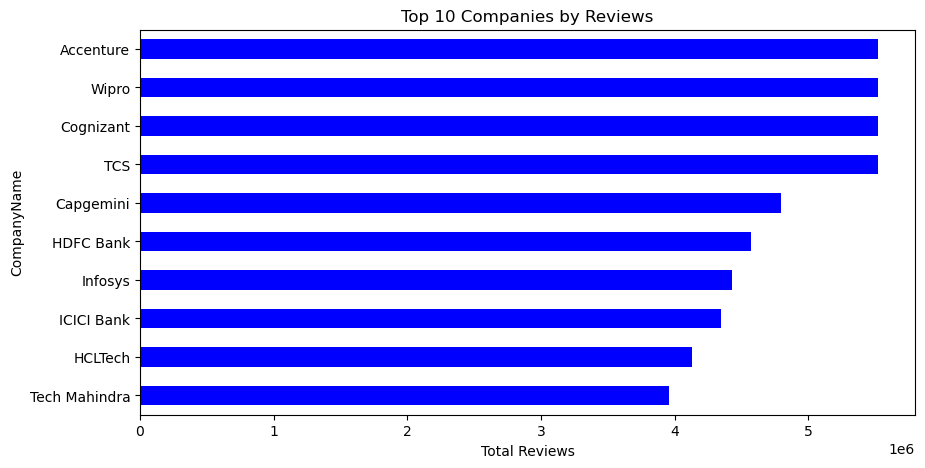

In [60]:
top_reviews = df1.groupby('CompanyName')['Reviews'].sum().sort_values(ascending=False).head(10)
top_reviews.plot(kind='barh', figsize=(10, 5), color='blue')
plt.title("Top 10 Companies by Reviews")
plt.xlabel("Total Reviews")
plt.gca().invert_yaxis()
plt.show()

**Observations**
* Accenture,Wipro,Cognizant,TCS,Capgemini,HDFC Bank,Infosys,ICIC Bank,HCLTech,Tech Mahindra are the top 10 companies
* Accenture,Wipro,Cognizant,TCS has highest reviews i.e these 4 companies has high employee base and actively participating in review platforms
* the list include both IT companies like Infosys,HCL Tech,Tech Mahindra & Banks are HDFC Bank,ICIC Bank suggesting that job reviews are widespread across industries

**Top Companies with number of Jobs**

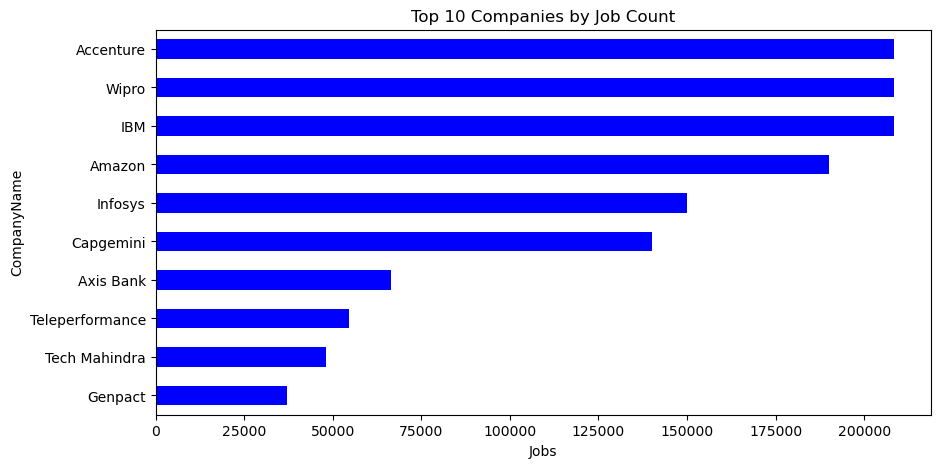

In [61]:
top_jobs = df1.groupby('CompanyName')['Jobs'].sum().sort_values(ascending=False).head(10)
top_jobs.plot(kind='barh', figsize=(10,5), color='Blue')
plt.title("Top 10 Companies by Job Count")
plt.xlabel("Jobs")
plt.gca().invert_yaxis()
plt.show()

**Observations**
**Accenture,Wipro,IBM,Amazon,Infosys,Capgmenini,Axis Bank,Teleperformance,Tech Mahindra,genpect**
* Accenture,Wipro,IBM has active recruitment in  IT services 
* other companies with notable job posting including Axis Bank,Teleperformance,Tech Mahindra,genpact showing 
  both IT and banking seectors are active
* Capgemini,Tech Mahindra,Genpact also present in top 10 though with releatively fewer jobs

**Different Sectors with Highest Average Salary**

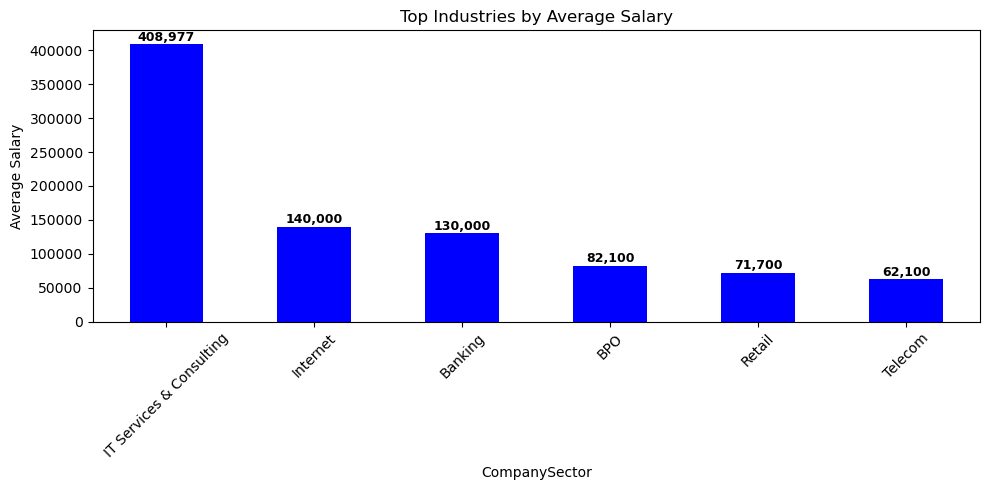

In [73]:
CompanySector_salary = df1.groupby('CompanySector')['Salaries'].mean().sort_values(ascending=False).head(10)
a=CompanySector_salary.plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Top Industries by Average Salary")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)

for i, v in enumerate(CompanySector_salary):
    a.text(i, v + 1000, f"{v:,.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


**Observations**
**1.IT Services & Consulting leads**
* This industry has highest average salary by a substancial margin of 408,977
**Banking and Internet Sectors follows**
  * these two shows the next highest average salaries of margin 140,000 and 130,000 but compareitively lower than it services
**BPO,Retail&Telecom**
 * these show lower average salaries which are significantly lower than 10000 units.telecom having least average salary among all

**Benefits for each sectors**

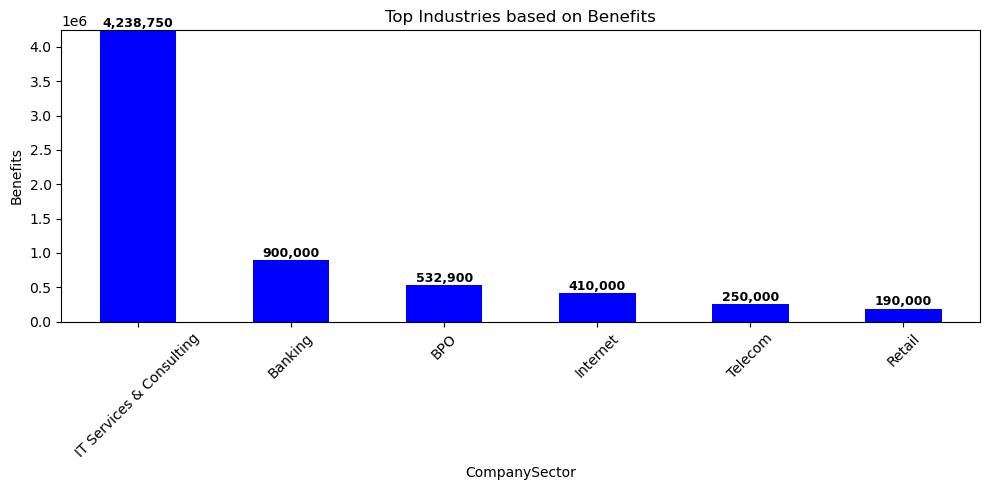

In [78]:
CompanySector_salary = df1.groupby('CompanySector')['Benefits'].sum().sort_values(ascending=False).head(10)
a=CompanySector_salary.plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Top Industries based on Benefits")
plt.ylabel("Benefits")
plt.xticks(rotation=45)
plt.ylim(0, CompanySector_salary.max() + 2000)

for i, v in enumerate(CompanySector_salary):
    a.text(i, v + 1000, f"{v:,.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


**Observations**
* IT Services and Consulting provides more benefits followed by Banking Sector provide more benefits to the employees but banking sector provide less benefits compared to IT services
* Telecom and retail Sectors provide less benefits to the employees.retail sector has least benefits

**Total Job openings by Primary City**

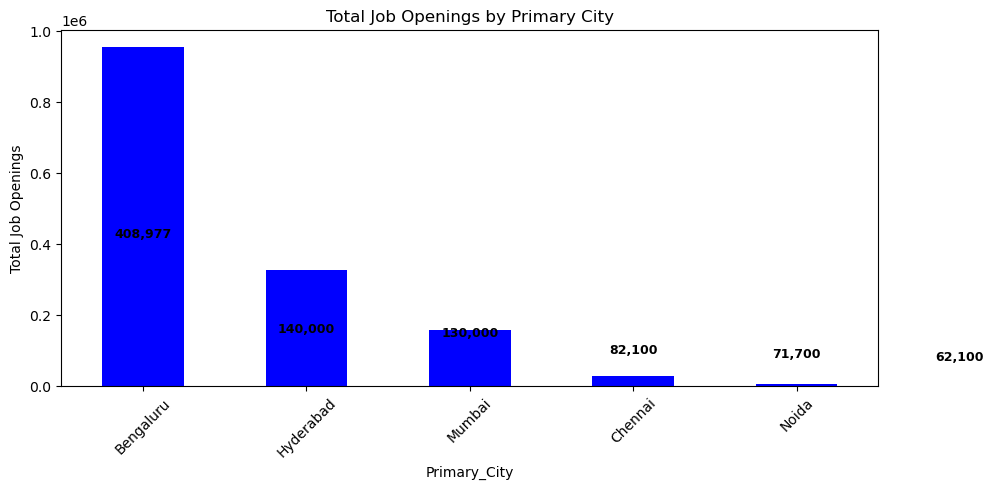

In [64]:
jobs_by_city = df1.groupby('Primary_City')['Jobs'].sum().sort_values(ascending=False)
jobs_by_city
a=jobs_by_city.plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Total Job Openings by Primary City")
plt.ylabel("Total Job Openings")
plt.xticks(rotation=45)
for i, v in enumerate(CompanySector_salary):
    a.text(i, v + 1000, f"{v:,.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


**Observation on Total Job Openings by Primary City**
* **Bengaluru domainates job opening**
  * bengaluru has a significantly higher number of job openings compared to all other cities

* **Mumbai & Hyderabad**
  * Mumbai followed by hyderabad show the next highest number of jobs opening,
    
  * but they are dramtically lower than bengaluru 
 
* **Chennai & Noida**
  * In chennai and noida there are lower job opening compared to job openings in  mumbai